## Implementing the forward Euler method

---


Let us begin with a first-order differential equation involving a function of only one variable and then proceed to see how we can extend the same code, to numerically integrate a system of first-order differential equations.


Below is the code to solve an equation of the type,

$\dot x = f(x, t)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def forwardEuler(f, xi, span, dt = 0.001):
    ti, tf = span
    steps = int((tf-ti)/dt)  #obtains the number of points in the discretized domain 
    
    # Allocate empty arrays to store x and t values
    x = np.empty(steps)
    t = np.empty(steps)
    
    # Set the initial values of the arrays
    x[0], t[0] = xi, 0.0

    # Euler method iteration
    for i in range(steps-1):
        x[i+1] = x[i] + dt * f(x[i], t[i])
        t[i+1] = t[i] + dt
    
    return (x, t)

#### Input parameters
`f` : which is the function giving the value of the derivative at x

`x0` : this is the initial condition for the problem

`span` : this is the span of the domain $[t_i, t_f]$ over which we wish to integrate the equation.

`dt` : this is the step size, more often than not, $10^{-3}$ works well enough. But lower the step size, higher the accuracy!


### Examples

---


#### 1) Exponential growth

We would like to study the solutions of this differential equation:

$$\frac{dx}{dt} = kx$$

Let us solve this for some random initial conditions:

1) Let `k = 10`,  `x(0.1) = 1` and we would like to solve for the solution in `t in [0.1, 1.0)`.

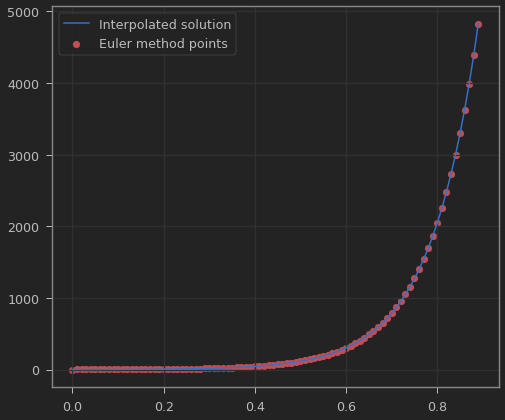

In [51]:
def f(x, t):
    return 10*x

x0 = 1
span = (0.1, 1.0)
solution, t = forwardEuler(f, x0, span, 0.01)

plt.plot(t, solution, label = "Interpolated solution", color = "b")
plt.scatter(t, solution, label = "Euler method points", color = "r")
plt.grid()
plt.legend()

As expected, we obtain an exponential growth. Try plotting the known analytical solution and plot the error in our numerical estimate.

---


2) Let `k = -10`,  `x(0.1) = 1` and we would like to solve for the solution in `t in [0.1, 1.0)`.

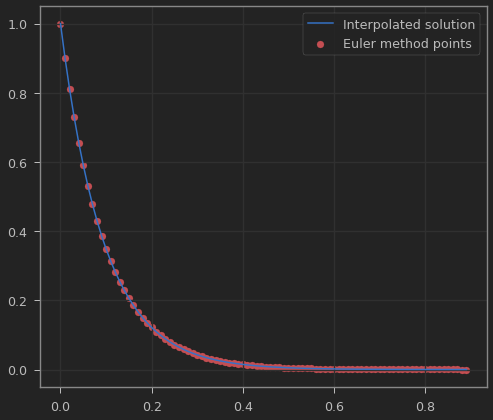

In [52]:
def f(x, t):
    return -10*x

x0 = 1
span = (0.1, 1.0)
solution, t = forwardEuler(f, x0, span, 0.01)

plt.plot(t, solution, label = "Interpolated solution", color = "b")
plt.scatter(t, solution, label = "Euler method points", color = "r")
plt.grid()
plt.legend()

By changing the sign of the exponent, we now obtain an exponentially decaying solution. This serves as a decent sanity-check for whether our integration scheme is working or not.


---

#### 2. Logistic growth
This is a simple toy model that can be used to simulate population growth when there is a factor that limits their growth (a population cap). The model is given by the differential equation,

$\frac{dx}{dt} = \gamma \cdot x \cdot (1 - \frac{x}{K})$

-$x$ : number of individuals

-$\gamma$ : growth rate

-$K$ : population cap

1) Let the model parameters be `gamma = 0.95`,  `K = 100`. Let `x(0.0) = 1` and we would like the solution for `t in [0.0, 11.0)`.

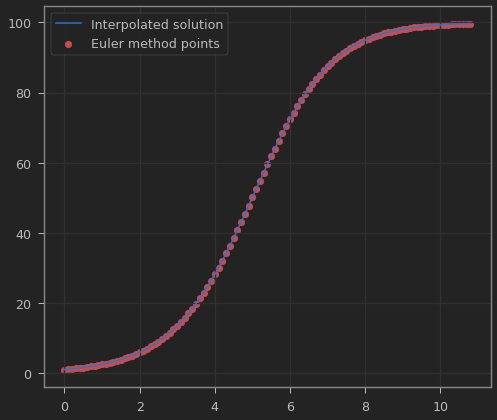

In [55]:
def f(x, t):
    return 0.95*x*(1-x/100)

x0 = 1
span = (0.1, 11.0)
solution, t = forwardEuler(f, x0, span, 0.1)

plt.plot(t, solution, label = "Interpolated solution", color = "b")
plt.scatter(t, solution, label = "Euler method points", color = "r")
plt.grid()
plt.legend()

We can now play around with the parameter values and initial conditions to study the behaviour of this differential equation.